In [1]:
import sys
sys.path.append("../")

In [2]:
from pathlib import Path
import shutil
import os
import rasterio
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sentinelsat import SentinelAPI

# register at https://scihub.copernicus.eu/dhus/#/home
user = 'mecton'
password = 'C3bi6rM5ov4PB#q%KC9h7uSNt%pofcoW%grc9xnh!h9%5S8h5Z'
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [4]:
labels = [
    {'date': ('20200928', '20200930'), 'tile_name': '10SEH'},
    {'date': ('20201004', '20201009'), 'tile_name': '10TDK'},
    {'date': ('20200928', '20200930'), 'tile_name': '10TDL'},
    {'date': ('20200627', '20200629'), 'tile_name': '10SFG'},
    {'date': ('20200714', '20200716'), 'tile_name': '10SGF'},
    {'date': ('20200719', '20200721'), 'tile_name': '10SGF'},
    {'date': ('20200722', '20200724'), 'tile_name': '10TFK'},
    {'date': ('20200816', '20200818'), 'tile_name': '10TGK'},
    {'date': ('20200722', '20200724'), 'tile_name': '10TFL'},
    {'date': ('20200722', '20200724'), 'tile_name': '10TFM'},
    {'date': ('20200909', '20200911'), 'tile_name': '11SMT'},
    {'date': ('20200914', '20200916'), 'tile_name': '11SMT'},
    {'date': ('20200909', '20200911'), 'tile_name': '11SMU'},
    {'date': ('20200914', '20200916'), 'tile_name': '11SMU'},
    {'date': ('20200902', '20200904'), 'tile_name': '11SLA'},
    {'date': ('20200904', '20200906'), 'tile_name': '11SLA'},
    {'date': ('20200907', '20200909'), 'tile_name': '11SLA'},
    {'date': ('20200909', '20200911'), 'tile_name': '11SLA'},
    {'date': ('20200912', '20200914'), 'tile_name': '11SLA'},
    {'date': ('20200914', '20200916'), 'tile_name': '11SLA'},
    {'date': ('20200917', '20200919'), 'tile_name': '11SLA'},
    {'date': ('20200919', '20200921'), 'tile_name': '11SLA'},
    {'date': ('20200922', '20200924'), 'tile_name': '11SLA'},
    {'date': ('20200924', '20200926'), 'tile_name': '11SLA'},
    {'date': ('20200927', '20200929'), 'tile_name': '11SLA'},
    {'date': ('20200929', '20201001'), 'tile_name': '11SLA'},
    {'date': ('20201002', '20201004'), 'tile_name': '11SLA'},
    {'date': ('20201007', '20201009'), 'tile_name': '11SLA'},
    {'date': ('20201009', '20201011'), 'tile_name': '11SLA'},
    {'date': ('20201012', '20201014'), 'tile_name': '11SLA'},
    {'date': ('20201014', '20201016'), 'tile_name': '11SLA'},
    {'date': ('20201017', '20201019'), 'tile_name': '11SLA'},
    {'date': ('20201019', '20201021'), 'tile_name': '11SLA'},
    {'date': ('20201022', '20201024'), 'tile_name': '11SLA'},
    {'date': ('20201024', '20201026'), 'tile_name': '11SLA'},
    {'date': ('20201027', '20201029'), 'tile_name': '11SLA'},
    {'date': ('20201029', '20201031'), 'tile_name': '11SLA'},
    {'date': ('20201101', '20201103'), 'tile_name': '11SLA'},
    {'date': ('20201103', '20201105'), 'tile_name': '11SLA'},
    {'date': ('20200907', '20200909'), 'tile_name': '11SKB'},
    {'date': ('20200912', '20200914'), 'tile_name': '11SKB'},
    {'date': ('20200922', '20200924'), 'tile_name': '11SKB'},
    {'date': ('20200927', '20200929'), 'tile_name': '11SKB'},
    {'date': ('20201002', '20201004'), 'tile_name': '11SKB'},
    {'date': ('20201012', '20201014'), 'tile_name': '11SKB'},
    {'date': ('20200907', '20200909'), 'tile_name': '11SLB'},
    {'date': ('20200912', '20200914'), 'tile_name': '11SLB'},
    {'date': ('20200922', '20200924'), 'tile_name': '11SLB'},
    {'date': ('20200927', '20200929'), 'tile_name': '11SLB'},
    {'date': ('20201002', '20201004'), 'tile_name': '11SLB'},
    {'date': ('20201012', '20201014'), 'tile_name': '11SLB'},
    {'date': ('20201017', '20201019'), 'tile_name': '11SLB'},
    {'date': ('20201022', '20201024'), 'tile_name': '11SLB'},
    {'date': ('20201027', '20201029'), 'tile_name': '11SLB'},
    {'date': ('20201101', '20201103'), 'tile_name': '11SLB'},
    {'date': ('20200907', '20200909'), 'tile_name': '11SKB'},
    {'date': ('20200912', '20200914'), 'tile_name': '11SKB'},
    {'date': ('20200903', '20200905'), 'tile_name': '10TDK'},
    {'date': ('20200908', '20200910'), 'tile_name': '10TDK'},
    {'date': ('20200913', '20200915'), 'tile_name': '10TDK'},
    {'date': ('20200918', '20200920'), 'tile_name': '10TDK'},
    {'date': ('20200928', '20200930'), 'tile_name': '10TDK'},
    {'date': ('20200903', '20200905'), 'tile_name': '10TDL'},
    {'date': ('20200908', '20200910'), 'tile_name': '10TDL'},
    {'date': ('20200913', '20200915'), 'tile_name': '10TDL'},
    {'date': ('20200903', '20200904'), 'tile_name': '10TEK'},
    {'date': ('20200905', '20200907'), 'tile_name': '10TEK'},
    {'date': ('20200913', '20200915'), 'tile_name': '10TEK'},
    {'date': ('20200924', '20200926'), 'tile_name': '10TEK'},
    {'date': ('20200928', '20200930'), 'tile_name': '10TEK'},
    {'date': ('20200910', '20200912'), 'tile_name': '10TFK'},
    {'date': ('20200915', '20200917'), 'tile_name': '10TFK'},
    {'date': ('20200903', '20200905'), 'tile_name': '10TEQ'},
    {'date': ('20200908', '20200910'), 'tile_name': '10TEQ'},
    {'date': ('20200913', '20200915'), 'tile_name': '10TEQ'},
    {'date': ('20200903', '20200905'), 'tile_name': '10TFS'},
    {'date': ('20200801', '20200802'), 'tile_name': '11SNT'},
    {'date': ('20200803', '20200804'), 'tile_name': '11SNT'},
    {'date': ('20200806', '20200807'), 'tile_name': '11SNT'}
]

In [5]:
import itertools
import datetime

tiles = itertools.groupby(labels, lambda x: x['tile_name'])
tile_date = {}

for tile, dates in tiles:
    start_date = min(d['date'][0] for d in dates)
    tile_date[tile] = {
        'positive_date': start_date,
        'negative_date': (datetime.datetime.strptime(start_date, '%Y%m%d') - datetime.timedelta(days=30)).strftime('%Y%m%d')
    }

In [6]:
tile_date

{'10SEH': {'positive_date': '20200928', 'negative_date': '20200829'},
 '10TDK': {'positive_date': '20200903', 'negative_date': '20200804'},
 '10TDL': {'positive_date': '20200903', 'negative_date': '20200804'},
 '10SFG': {'positive_date': '20200627', 'negative_date': '20200528'},
 '10SGF': {'positive_date': '20200714', 'negative_date': '20200614'},
 '10TFK': {'positive_date': '20200910', 'negative_date': '20200811'},
 '10TGK': {'positive_date': '20200816', 'negative_date': '20200717'},
 '10TFL': {'positive_date': '20200722', 'negative_date': '20200622'},
 '10TFM': {'positive_date': '20200722', 'negative_date': '20200622'},
 '11SMT': {'positive_date': '20200909', 'negative_date': '20200810'},
 '11SMU': {'positive_date': '20200909', 'negative_date': '20200810'},
 '11SLA': {'positive_date': '20200902', 'negative_date': '20200803'},
 '11SKB': {'positive_date': '20200907', 'negative_date': '20200808'},
 '11SLB': {'positive_date': '20200907', 'negative_date': '20200808'},
 '10TEK': {'positive

In [4]:
def download(tile_name, date):
    print("Dowloading", tile_name, "in", date)
    products = api.query(
        date=date, tileid=tile_name,
        platformname='Sentinel-2', producttype="S2MSI1C"
    )
    
    dir_ = "sentinelsat/"
    try:
        os.mkdir(dir_)
    except:
        pass

    downloaded_products = api.download_all(products, directory_path=dir_)
    
    product = list(downloaded_products[0].values())[0]
    file_name = f"{dir_}{product['title']}.zip" 
    return file_name

In [5]:
def load_band(path, band):
    unarchive_dir = path.parent
    shutil.unpack_archive(path, unarchive_dir)
    
    data_path = str(path).replace(".zip", ".SAFE")
    band_files = glob(data_path + "/GRANULE/*/IMG_DATA/*.jp2")

    def get_band_array(band, band_files):
        band_file = [bf for bf in band_files if band in bf][0]
        array = rasterio.open(band_file).read(1)
        return array

    return get_band_array(band, band_files) 

In [63]:
b12s_p = {}
b12s_n = {}

In [64]:
for tile, dates in tile_date.items():
    positive_start_date = datetime.datetime.strptime(dates["positive_date"], '%Y%m%d')
    positive_end_date = (positive_start_date + datetime.timedelta(days=2)).strftime('%Y%m%d')
    
    negative_start_date = datetime.datetime.strptime(dates["negative_date"], '%Y%m%d')
    negative_end_date = (negative_start_date + datetime.timedelta(days=5)).strftime('%Y%m%d')
    
    positive_file = download(tile, (positive_start_date.strftime('%Y%m%d'), positive_end_date))
    negative_file = download(tile, (negative_start_date.strftime('%Y%m%d'), negative_end_date))
    
    b12s_p[tile] = {"path": positive_file}
    b12s_n[tile] = {"path": negative_file}

Dowloading 10SEH in ('20200928', '20200930')


Downloading: 100%|██████████| 357M/357M [00:51<00:00, 6.94MB/s] 
MD5 checksumming: 100%|██████████| 357M/357M [00:01<00:00, 291MB/s] 


Dowloading 10SEH in ('20200829', '20200903')


Downloading:   0%|          | 1.05M/816M [00:00<02:04, 6.54MB/s]
Downloading:   0%|          | 3.15M/816M [00:00<02:13, 6.11MB/s]
Downloading:   1%|          | 5.24M/816M [00:00<01:38, 8.23MB/s]
Downloading:   1%|          | 8.39M/816M [00:01<01:31, 8.80MB/s]
Downloading:   1%|          | 9.44M/816M [00:01<01:39, 8.12MB/s]
Downloading:   1%|▏         | 10.5M/816M [00:01<01:34, 8.54MB/s]
Downloading:   1%|▏         | 5.24M/373M [00:01<01:09, 5.26MB/s]
Downloading:   2%|▏         | 7.34M/373M [00:01<00:49, 7.33MB/s]
Downloading:   2%|▏         | 12.6M/816M [00:02<02:53, 4.63MB/s]
Downloading:   3%|▎         | 11.5M/373M [00:01<00:46, 7.76MB/s]
Downloading:   2%|▏         | 15.7M/816M [00:02<02:43, 4.90MB/s]
Downloading:   4%|▎         | 13.6M/373M [00:02<01:19, 4.51MB/s]
Downloading:   4%|▍         | 15.7M/373M [00:02<01:00, 5.95MB/s]
Downloading:   2%|▏         | 16.8M/816M [00:03<03:45, 3.55MB/s]
Downloading:   2%|▏         | 17.8M/816M [00:03<03:26, 3.86MB/s]
Downloading:   5%|▌      

Dowloading 10TDK in ('20200903', '20200905')


Downloading: 100%|██████████| 821M/821M [05:19<00:00, 2.57MB/s] 
MD5 checksumming: 100%|██████████| 821M/821M [00:02<00:00, 366MB/s] 


Dowloading 10TDK in ('20200804', '20200809')


Downloading:  17%|█▋        | 3.15M/18.9M [00:01<00:05, 2.86MB/s]
Downloading:  22%|██▏       | 4.19M/18.9M [00:01<00:04, 3.15MB/s]
Downloading:  28%|██▊       | 5.24M/18.9M [00:02<00:05, 2.31MB/s][A
Downloading:  33%|███▎      | 6.29M/18.9M [00:02<00:05, 2.38MB/s][A
Downloading:  39%|███▉      | 7.34M/18.9M [00:02<00:04, 2.43MB/s][A
Downloading:  44%|████▍     | 8.39M/18.9M [00:03<00:04, 2.44MB/s][A
Downloading:  50%|████▉     | 9.44M/18.9M [00:03<00:03, 2.52MB/s][A
Downloading:   1%|          | 6.29M/848M [00:02<04:42, 2.98MB/s]
Downloading:  55%|█████▌    | 10.5M/18.9M [00:04<00:03, 2.62MB/s][A
Downloading:   1%|          | 8.39M/848M [00:02<03:40, 3.81MB/s]
Downloading:  61%|██████    | 11.5M/18.9M [00:04<00:02, 2.71MB/s][A
Downloading:  66%|██████▋   | 12.6M/18.9M [00:05<00:02, 2.17MB/s][A
Downloading:  72%|███████▏  | 13.6M/18.9M [00:05<00:02, 2.34MB/s][A
Downloading:  78%|███████▊  | 14.7M/18.9M [00:06<00:01, 2.23MB/s][A
Downloading:   2%|▏         | 13.6M/848M [00:04<05:07, 2.7

Dowloading 10TDL in ('20200903', '20200905')


Downloading: 100%|██████████| 807M/807M [03:16<00:00, 4.12MB/s] 
MD5 checksumming: 100%|██████████| 807M/807M [00:01<00:00, 505MB/s] 


Dowloading 10TDL in ('20200804', '20200809')


Downloading:   0%|          | 0.00/155M [00:00<?, ?B/s]
Downloading:   1%|          | 1.05M/155M [00:00<00:26, 5.75MB/s]
Downloading:   3%|▎         | 4.19M/155M [00:00<00:22, 6.77MB/s]
Downloading:   0%|          | 3.15M/808M [00:00<02:51, 4.69MB/s]
Downloading:   4%|▍         | 6.29M/155M [00:00<00:23, 6.45MB/s]
Downloading:   1%|          | 5.24M/808M [00:01<02:32, 5.25MB/s]
Downloading:   5%|▍         | 7.34M/155M [00:01<00:25, 5.90MB/s]
Downloading:   1%|          | 7.34M/808M [00:01<02:00, 6.66MB/s]
Downloading:   7%|▋         | 11.5M/155M [00:02<00:27, 5.26MB/s]
Downloading:   1%|▏         | 10.5M/808M [00:02<03:15, 4.07MB/s]
Downloading:   8%|▊         | 12.6M/155M [00:02<00:46, 3.06MB/s]
Downloading:   9%|▉         | 13.6M/155M [00:03<00:38, 3.64MB/s]
Downloading:   9%|▉         | 14.7M/155M [00:03<00:37, 3.72MB/s]
Downloading:   2%|▏         | 14.7M/808M [00:03<03:00, 4.40MB/s]
Downloading:  10%|█         | 15.7M/155M [00:03<00:37, 3.73MB/s]
Downloading:   2%|▏         | 16.8

Dowloading 10SFG in ('20200627', '20200629')


Downloading: 100%|██████████| 848M/848M [04:36<00:00, 3.07MB/s] 
MD5 checksumming: 100%|██████████| 848M/848M [00:01<00:00, 490MB/s] 


Dowloading 10SFG in ('20200528', '20200602')


Downloading:   0%|          | 1.05M/817M [00:00<02:07, 6.39MB/s]
Downloading:   0%|          | 2.10M/817M [00:00<02:05, 6.48MB/s]
Downloading:   0%|          | 3.15M/817M [00:00<02:09, 6.30MB/s]
Downloading:   1%|          | 4.19M/817M [00:00<02:18, 5.87MB/s]
Downloading:   1%|          | 3.15M/295M [00:00<00:46, 6.23MB/s]
Downloading:   1%|          | 5.24M/817M [00:00<02:28, 5.46MB/s]
Downloading:   1%|          | 6.29M/817M [00:01<02:38, 5.12MB/s]
Downloading:   1%|          | 7.34M/817M [00:01<02:36, 5.19MB/s]
Downloading:   2%|▏         | 7.34M/295M [00:01<00:44, 6.42MB/s]
Downloading:   3%|▎         | 8.39M/295M [00:01<00:40, 7.13MB/s]
Downloading:   1%|          | 8.39M/817M [00:01<03:04, 4.38MB/s]
Downloading:   1%|          | 9.44M/817M [00:01<03:04, 4.37MB/s]
Downloading:   1%|▏         | 11.5M/817M [00:02<02:54, 4.61MB/s]
Downloading:   2%|▏         | 12.6M/817M [00:02<02:43, 4.91MB/s]
Downloading:   2%|▏         | 13.6M/817M [00:02<02:39, 5.05MB/s]
Downloading:   2%|▏      

Dowloading 10SGF in ('20200714', '20200716')


Downloading: 100%|██████████| 812M/812M [05:31<00:00, 2.45MB/s] 
MD5 checksumming: 100%|██████████| 812M/812M [00:01<00:00, 463MB/s] 


Dowloading 10SGF in ('20200614', '20200619')


Downloading:   0%|          | 0.00/759M [00:00<?, ?B/s]
Downloading:   0%|          | 2.10M/759M [00:00<04:53, 2.58MB/s]
Downloading:   1%|          | 4.19M/759M [00:01<05:32, 2.27MB/s][A
Downloading:   1%|          | 5.24M/759M [00:02<05:00, 2.51MB/s]
Downloading:   1%|          | 6.29M/759M [00:02<05:43, 2.19MB/s]
Downloading:   1%|          | 7.34M/759M [00:03<05:34, 2.25MB/s]
Downloading:   1%|          | 8.39M/759M [00:03<05:35, 2.24MB/s]
Downloading:   1%|          | 9.44M/759M [00:03<04:53, 2.55MB/s]
Downloading:   1%|▏         | 10.5M/759M [00:04<04:07, 3.03MB/s]
Downloading:   2%|▏         | 11.5M/759M [00:04<04:08, 3.01MB/s]
Downloading:   2%|▏         | 12.6M/759M [00:04<03:56, 3.16MB/s]
Downloading:   2%|▏         | 13.6M/759M [00:05<03:29, 3.57MB/s]
Downloading:   2%|▏         | 15.7M/759M [00:05<03:44, 3.32MB/s]
Downloading:   7%|▋         | 12.6M/179M [00:05<01:01, 2.73MB/s]
Downloading:   2%|▏         | 17.8M/759M [00:06<04:48, 2.57MB/s]
Downloading:   2%|▏         | 18

Dowloading 10TFK in ('20200910', '20200912')


Downloading: 100%|██████████| 747M/747M [02:41<00:00, 4.63MB/s] 
MD5 checksumming: 100%|██████████| 747M/747M [00:01<00:00, 458MB/s] 


Dowloading 10TFK in ('20200811', '20200816')


Downloading:   0%|          | 1.05M/864M [00:00<02:09, 6.64MB/s]
Downloading:   1%|          | 8.39M/864M [00:01<02:01, 7.06MB/s]
Downloading:   2%|▏         | 1.05M/62.7M [00:01<01:29, 690kB/s]
Downloading:   1%|          | 9.44M/864M [00:02<07:22, 1.93MB/s]]
Downloading:   1%|          | 10.5M/864M [00:03<06:31, 2.18MB/s]]
Downloading:   1%|▏         | 12.6M/864M [00:03<04:41, 3.03MB/s]]
Downloading:   2%|▏         | 15.7M/864M [00:04<03:17, 4.30MB/s]]
Downloading:   2%|▏         | 16.8M/864M [00:04<03:01, 4.66MB/s]]
Downloading:   2%|▏         | 17.8M/864M [00:04<02:52, 4.89MB/s]]
Downloading:   3%|▎         | 22.0M/864M [00:05<02:09, 6.50MB/s]]
Downloading:   3%|▎         | 23.1M/864M [00:05<02:40, 5.23MB/s]]
Downloading:   3%|▎         | 24.1M/864M [00:05<02:37, 5.34MB/s]]
Downloading:  18%|█▊        | 11.5M/62.7M [00:05<00:15, 3.26MB/s]
Downloading:   3%|▎         | 25.2M/864M [00:06<03:28, 4.02MB/s]]
Downloading:   3%|▎         | 26.2M/864M [00:06<02:53, 4.83MB/s]]
Downloading: 

Dowloading 10TGK in ('20200816', '20200818')


Downloading: 100%|██████████| 746M/746M [04:35<00:00, 2.70MB/s] 
MD5 checksumming: 100%|██████████| 746M/746M [00:01<00:00, 508MB/s] 


Dowloading 10TGK in ('20200717', '20200722')


Downloading:   1%|          | 6.29M/602M [00:01<02:13, 4.47MB/s]
Downloading:   1%|▏         | 8.39M/602M [00:01<02:36, 3.81MB/s]
Downloading:   2%|▏         | 10.5M/602M [00:02<02:16, 4.34MB/s]
Downloading:   2%|▏         | 12.6M/602M [00:02<01:55, 5.11MB/s]
Downloading:   2%|▏         | 13.6M/602M [00:02<01:41, 5.79MB/s]
Downloading:   3%|▎         | 16.8M/602M [00:03<01:33, 6.24MB/s]
Downloading:   3%|▎         | 19.9M/602M [00:03<01:14, 7.77MB/s]
Downloading:   4%|▍         | 24.1M/602M [00:04<01:02, 9.30MB/s]
Downloading:   4%|▍         | 26.2M/602M [00:04<01:06, 8.70MB/s]
Downloading:   5%|▍         | 28.3M/602M [00:04<01:35, 5.99MB/s]
Downloading:   5%|▌         | 31.5M/602M [00:05<01:49, 5.21MB/s]
Downloading:   6%|▌         | 33.6M/602M [00:05<02:01, 4.68MB/s]
Downloading:   6%|▌         | 34.6M/602M [00:06<01:54, 4.96MB/s]
Downloading:   6%|▌         | 35.7M/602M [00:06<01:50, 5.13MB/s]
Downloading:   6%|▌         | 36.7M/602M [00:06<01:41, 5.56MB/s]
Downloading:   2%|▏      

Dowloading 10TFL in ('20200722', '20200724')


Downloading: 100%|██████████| 836M/836M [03:30<00:00, 3.97MB/s] 
MD5 checksumming: 100%|██████████| 836M/836M [00:01<00:00, 523MB/s] 


Dowloading 10TFL in ('20200622', '20200627')


Downloading:   0%|          | 0.00/238M [00:00<?, ?B/s]
Downloading:   0%|          | 1.05M/238M [00:00<01:00, 3.90MB/s]
Downloading:   1%|▏         | 3.15M/238M [00:00<01:03, 3.72MB/s]
Downloading:   2%|▏         | 4.19M/238M [00:01<01:04, 3.62MB/s]
Downloading:   2%|▏         | 5.24M/238M [00:01<01:05, 3.53MB/s]
Downloading:   3%|▎         | 7.34M/238M [00:01<01:01, 3.77MB/s]
Downloading:   4%|▍         | 9.44M/238M [00:02<01:02, 3.66MB/s]
Downloading:   4%|▍         | 10.5M/238M [00:03<01:14, 3.05MB/s]
Downloading:   5%|▍         | 11.5M/238M [00:03<01:22, 2.76MB/s]
Downloading:   5%|▌         | 12.6M/238M [00:03<01:21, 2.78MB/s]
Downloading:   6%|▌         | 13.6M/238M [00:04<01:19, 2.83MB/s]
Downloading:   1%|          | 10.5M/846M [00:04<06:04, 2.29MB/s]
Downloading:   6%|▌         | 14.7M/238M [00:04<01:35, 2.34MB/s]
Downloading:   7%|▋         | 15.7M/238M [00:05<01:36, 2.30MB/s]
Downloading:   7%|▋         | 16.8M/238M [00:05<01:28, 2.49MB/s]
Downloading:   7%|▋         | 17.8

Dowloading 10TFM in ('20200722', '20200724')


Downloading: 100%|██████████| 832M/832M [03:25<00:00, 4.06MB/s] 
MD5 checksumming: 100%|██████████| 832M/832M [00:01<00:00, 537MB/s] 


Dowloading 10TFM in ('20200622', '20200627')


Downloading:   0%|          | 1.05M/424M [00:00<01:08, 6.18MB/s]
Downloading:   2%|▏         | 7.34M/424M [00:01<01:09, 5.99MB/s]
Downloading:   3%|▎         | 11.5M/424M [00:02<01:05, 6.27MB/s][A
Downloading:   3%|▎         | 13.6M/424M [00:02<01:47, 3.83MB/s]
Downloading:   0%|          | 3.15M/833M [00:02<10:30, 1.32MB/s]
Downloading:   3%|▎         | 14.7M/424M [00:03<02:07, 3.22MB/s]
Downloading:   4%|▎         | 15.7M/424M [00:03<02:19, 2.94MB/s]
Downloading:   4%|▍         | 16.8M/424M [00:04<02:18, 2.93MB/s]
Downloading:   4%|▍         | 17.8M/424M [00:04<02:26, 2.78MB/s]
Downloading:   4%|▍         | 18.9M/424M [00:04<02:25, 2.79MB/s]
Downloading:   1%|          | 9.44M/833M [00:04<04:41, 2.92MB/s]
Downloading:   5%|▍         | 19.9M/424M [00:05<02:24, 2.79MB/s]
Downloading:   1%|▏         | 11.5M/833M [00:05<03:59, 3.42MB/s]
Downloading:   5%|▍         | 21.0M/424M [00:05<02:37, 2.57MB/s]
Downloading:   5%|▌         | 22.0M/424M [00:06<02:23, 2.81MB/s]
Downloading:   2%|▏    

Dowloading 11SMT in ('20200909', '20200911')


Downloading: 100%|██████████| 720M/720M [04:04<00:00, 2.95MB/s] 
MD5 checksumming: 100%|██████████| 720M/720M [00:01<00:00, 529MB/s] 


Dowloading 11SMT in ('20200810', '20200815')


Downloading:   0%|          | 0.00/893M [00:00<?, ?B/s]
Downloading:   0%|          | 1.05M/893M [00:00<04:15, 3.49MB/s]
Downloading:   0%|          | 2.10M/893M [00:00<03:45, 3.95MB/s]
Downloading:   0%|          | 4.19M/893M [00:00<02:29, 5.96MB/s]
Downloading:   1%|          | 5.24M/893M [00:01<02:40, 5.54MB/s]
Downloading:   3%|▎         | 4.19M/153M [00:00<00:27, 5.38MB/s]
Downloading:   1%|          | 7.34M/893M [00:01<04:09, 3.54MB/s]
Downloading:   1%|          | 8.39M/893M [00:02<04:20, 3.39MB/s]
Downloading:   1%|          | 10.5M/893M [00:02<03:19, 4.41MB/s]
Downloading:   1%|▏         | 11.5M/893M [00:02<02:49, 5.20MB/s]
Downloading:   2%|▏         | 13.6M/893M [00:02<02:25, 6.03MB/s]
Downloading:   2%|▏         | 15.7M/893M [00:03<02:12, 6.59MB/s]
Downloading:   2%|▏         | 16.8M/893M [00:03<02:25, 6.02MB/s]
Downloading:   2%|▏         | 17.8M/893M [00:03<03:04, 4.73MB/s]
Downloading:   2%|▏         | 19.9M/893M [00:04<02:16, 6.40MB/s]
Downloading:  10%|▉         | 14.7

Dowloading 11SMU in ('20200909', '20200911')


Downloading: 100%|██████████| 741M/741M [03:06<00:00, 3.97MB/s] 
MD5 checksumming: 100%|██████████| 741M/741M [00:01<00:00, 408MB/s] 


Dowloading 11SMU in ('20200810', '20200815')


Downloading: 100%|██████████| 865M/865M [03:31<00:00, 4.09MB/s] 
MD5 checksumming: 100%|██████████| 865M/865M [00:01<00:00, 472MB/s] 


Dowloading 11SLA in ('20200902', '20200904')


Downloading: 100%|██████████| 833M/833M [04:12<00:00, 3.30MB/s] 
MD5 checksumming: 100%|██████████| 833M/833M [00:01<00:00, 450MB/s] 


Dowloading 11SLA in ('20200803', '20200808')


Downloading:   0%|          | 0.00/676M [00:00<?, ?B/s]
Downloading:   1%|          | 8.39M/676M [00:01<02:11, 5.06MB/s]
Downloading:   2%|▏         | 11.5M/676M [00:02<02:12, 5.01MB/s][A
Downloading:   2%|▏         | 14.7M/676M [00:03<02:07, 5.18MB/s][A
Downloading:   2%|▏         | 16.8M/676M [00:03<02:23, 4.59MB/s]
Downloading:   3%|▎         | 18.9M/676M [00:04<02:46, 3.95MB/s]
Downloading:   3%|▎         | 19.9M/676M [00:04<02:46, 3.93MB/s]
Downloading:   3%|▎         | 22.0M/676M [00:05<03:01, 3.61MB/s]
Downloading:   1%|          | 7.34M/864M [00:05<06:58, 2.05MB/s]
Downloading:   4%|▎         | 24.1M/676M [00:05<03:12, 3.38MB/s]
Downloading:   1%|          | 9.44M/864M [00:05<05:43, 2.49MB/s]
Downloading:   4%|▍         | 26.2M/676M [00:06<03:05, 3.50MB/s]
Downloading:   4%|▍         | 27.3M/676M [00:06<03:05, 3.49MB/s]
Downloading:   4%|▍         | 29.4M/676M [00:07<02:53, 3.72MB/s]
Downloading:   2%|▏         | 13.6M/864M [00:07<05:14, 2.70MB/s]
Downloading:   4%|▍         | 

Dowloading 11SKB in ('20200907', '20200909')


KeyboardInterrupt: 

In [65]:
b12s_p

{'10SEH': {'path': 'sentinelsat/S2B_MSIL1C_20200929T190109_N0209_R013_T10SEH_20200929T213343.zip'},
 '10TDK': {'path': 'sentinelsat/S2A_MSIL1C_20200904T185921_N0209_R013_T10TDK_20200904T225852.zip'},
 '10TDL': {'path': 'sentinelsat/S2A_MSIL1C_20200904T185921_N0209_R013_T10TDL_20200904T225852.zip'},
 '10SFG': {'path': 'sentinelsat/S2B_MSIL1C_20200628T184919_N0209_R113_T10SFG_20200628T220923.zip'},
 '10SGF': {'path': 'sentinelsat/S2B_MSIL1C_20200715T183919_N0209_R070_T10SGF_20200715T221807.zip'},
 '10TFK': {'path': 'sentinelsat/S2A_MSIL1C_20200911T184951_N0209_R113_T10TFK_20200911T223745.zip'},
 '10TGK': {'path': 'sentinelsat/S2B_MSIL1C_20200817T184919_N0209_R113_T10TGK_20200817T205939.zip'},
 '10TFL': {'path': 'sentinelsat/S2A_MSIL1C_20200723T184921_N0209_R113_T10TFL_20200723T223737.zip'},
 '10TFM': {'path': 'sentinelsat/S2A_MSIL1C_20200723T184921_N0209_R113_T10TFM_20200723T223737.zip'},
 '11SMT': {'path': 'sentinelsat/S2B_MSIL1C_20200910T182929_N0209_R027_T11SMT_20200910T221704.zip'},


In [66]:
b12s_n

{'10SEH': {'path': 'sentinelsat/S2B_MSIL1C_20200830T185919_N0209_R013_T10SEH_20200830T211053.zip'},
 '10TDK': {'path': 'sentinelsat/S2A_MSIL1C_20200808T190921_N0209_R056_T10TDK_20200808T225559.zip'},
 '10TDL': {'path': 'sentinelsat/S2A_MSIL1C_20200808T190921_N0209_R056_T10TDL_20200808T225559.zip'},
 '10SFG': {'path': 'sentinelsat/S2A_MSIL1C_20200531T183921_N0209_R070_T10SFG_20200531T221758.zip'},
 '10SGF': {'path': 'sentinelsat/S2B_MSIL1C_20200618T184919_N0209_R113_T10SGF_20200618T220530.zip'},
 '10TFK': {'path': 'sentinelsat/S2A_MSIL1C_20200815T185921_N0209_R013_T10TFK_20200815T224802.zip'},
 '10TGK': {'path': 'sentinelsat/S2A_MSIL1C_20200720T183921_N0209_R070_T10TGK_20200720T221625.zip'},
 '10TFL': {'path': 'sentinelsat/S2A_MSIL1C_20200626T185921_N0209_R013_T10TFL_20200627T001522.zip'},
 '10TFM': {'path': 'sentinelsat/S2A_MSIL1C_20200626T185921_N0209_R013_T10TFM_20200627T001522.zip'},
 '11SMT': {'path': 'sentinelsat/S2A_MSIL1C_20200813T181931_N0209_R127_T11SMT_20200813T220703.zip'},


In [6]:
b12s_p = {'10SEH': {'path': 'sentinelsat/S2B_MSIL1C_20200929T190109_N0209_R013_T10SEH_20200929T213343.zip'},
 '10TDK': {'path': 'sentinelsat/S2A_MSIL1C_20200904T185921_N0209_R013_T10TDK_20200904T225852.zip'},
 '10TDL': {'path': 'sentinelsat/S2A_MSIL1C_20200904T185921_N0209_R013_T10TDL_20200904T225852.zip'},
 '10SFG': {'path': 'sentinelsat/S2B_MSIL1C_20200628T184919_N0209_R113_T10SFG_20200628T220923.zip'},
 '10SGF': {'path': 'sentinelsat/S2B_MSIL1C_20200715T183919_N0209_R070_T10SGF_20200715T221807.zip'},
 '10TFK': {'path': 'sentinelsat/S2A_MSIL1C_20200911T184951_N0209_R113_T10TFK_20200911T223745.zip'},
 '10TGK': {'path': 'sentinelsat/S2B_MSIL1C_20200817T184919_N0209_R113_T10TGK_20200817T205939.zip'},
 '10TFL': {'path': 'sentinelsat/S2A_MSIL1C_20200723T184921_N0209_R113_T10TFL_20200723T223737.zip'},
 '10TFM': {'path': 'sentinelsat/S2A_MSIL1C_20200723T184921_N0209_R113_T10TFM_20200723T223737.zip'},
 '11SMT': {'path': 'sentinelsat/S2B_MSIL1C_20200910T182929_N0209_R027_T11SMT_20200910T221704.zip'},
 '11SMU': {'path': 'sentinelsat/S2B_MSIL1C_20200910T182929_N0209_R027_T11SMU_20200910T221704.zip'},
 '11SLA': {'path': 'sentinelsat/S2B_MSIL1C_20200903T183919_N0209_R070_T11SLA_20200903T220428.zip'}}

In [7]:
b12s_n = {'10SEH': {'path': 'sentinelsat/S2B_MSIL1C_20200830T185919_N0209_R013_T10SEH_20200830T211053.zip'},
 '10TDK': {'path': 'sentinelsat/S2A_MSIL1C_20200808T190921_N0209_R056_T10TDK_20200808T225559.zip'},
 '10TDL': {'path': 'sentinelsat/S2A_MSIL1C_20200808T190921_N0209_R056_T10TDL_20200808T225559.zip'},
 '10SFG': {'path': 'sentinelsat/S2A_MSIL1C_20200531T183921_N0209_R070_T10SFG_20200531T221758.zip'},
 '10SGF': {'path': 'sentinelsat/S2B_MSIL1C_20200618T184919_N0209_R113_T10SGF_20200618T220530.zip'},
 '10TFK': {'path': 'sentinelsat/S2A_MSIL1C_20200815T185921_N0209_R013_T10TFK_20200815T224802.zip'},
 '10TGK': {'path': 'sentinelsat/S2A_MSIL1C_20200720T183921_N0209_R070_T10TGK_20200720T221625.zip'},
 '10TFL': {'path': 'sentinelsat/S2A_MSIL1C_20200626T185921_N0209_R013_T10TFL_20200627T001522.zip'},
 '10TFM': {'path': 'sentinelsat/S2A_MSIL1C_20200626T185921_N0209_R013_T10TFM_20200627T001522.zip'},
 '11SMT': {'path': 'sentinelsat/S2A_MSIL1C_20200813T181931_N0209_R127_T11SMT_20200813T220703.zip'},
 '11SMU': {'path': 'sentinelsat/S2B_MSIL1C_20200811T182919_N0209_R027_T11SMU_20200811T215744.zip'},
 '11SLA': {'path': 'sentinelsat/S2A_MSIL1C_20200806T182921_N0209_R027_T11SLA_20200806T221938.zip'}}

In [ ]:
coordinates = {
    
}

In [8]:
from ds_exploration.plotting_utils import plot_image

In [9]:
def confidence(b12):
    hot = (np.array(b12).flatten() > 10_000).sum()
    
    if hot >= 3_000:
        return 1.0
    else:
        return .7 + hot / 3_000 * .3

In [50]:
import http.client
import json

conn = http.client.HTTPSConnection("forest-fires-service-v4-jrtltode5a-uw.a.run.app")

for tile, data in list(b12s_p.items())[:1]:
    path = Path(data['path'])
    b12 = load_band(path, "B12")
    
    shot_date = data['path'].split('_')[2].split('T')[0]
    name = f"CALIFORNIA_{tile}_{shot_date}"
    
    conf = confidence(b12)
    print(conf)
    
    payload = json.dumps({
      "location": name,
      "url": f"https://storage.googleapis.com/forest_fires_model_results/heat_detector/{name}.png",
      "longitude": -121.478851,
      "latitude": 38.575764,
      "processing_date": "Wed, 14 Apr 2021 00:00:00 GMT",
      "confidence_level": conf * 100
    })
    headers = {
      'Content-Type': 'application/json'
    }

    conn.request("POST", "/api/fires/", payload, headers)
    res = conn.getresponse()
    data = res.read()
    print(data.decode("utf-8"))
    
#     band2_blue = load_band(path, "B02")
#     band2_green = load_band(path, "B03")
#     band2_red = load_band(path, "B04")

#     rgb = np.dstack([band2_red, band2_green, band2_blue])
#     plot_image(rgb, factor=5/2e4, clip_range=(0,1))
#     plt.savefig(f'{name}.png',  bbox_inches='tight', pad_inches=0)

0.9047999999999999
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>



In [67]:
for tile, file in b12s_p.items():
    file['b12'] = load_band(Path(file['path']), "B12")

for tile, file in b12s_n.items():
    file['b12'] = load_band(Path(file['path']), "B12")

In [ ]:
def is_fire(np_b12):
    return (np_b12 > 10_000).sum() > 250

# Fire pictures examples

In [132]:
df_p = pd.DataFrame()

for tile, data in b12s_p.items():
    npa = np.array(data['b12']).flatten()
    df_p[f"{tile}_{data['path'].split('_')[2].split('T')[0]}_{len(npa[npa > 10000])}"] = npa

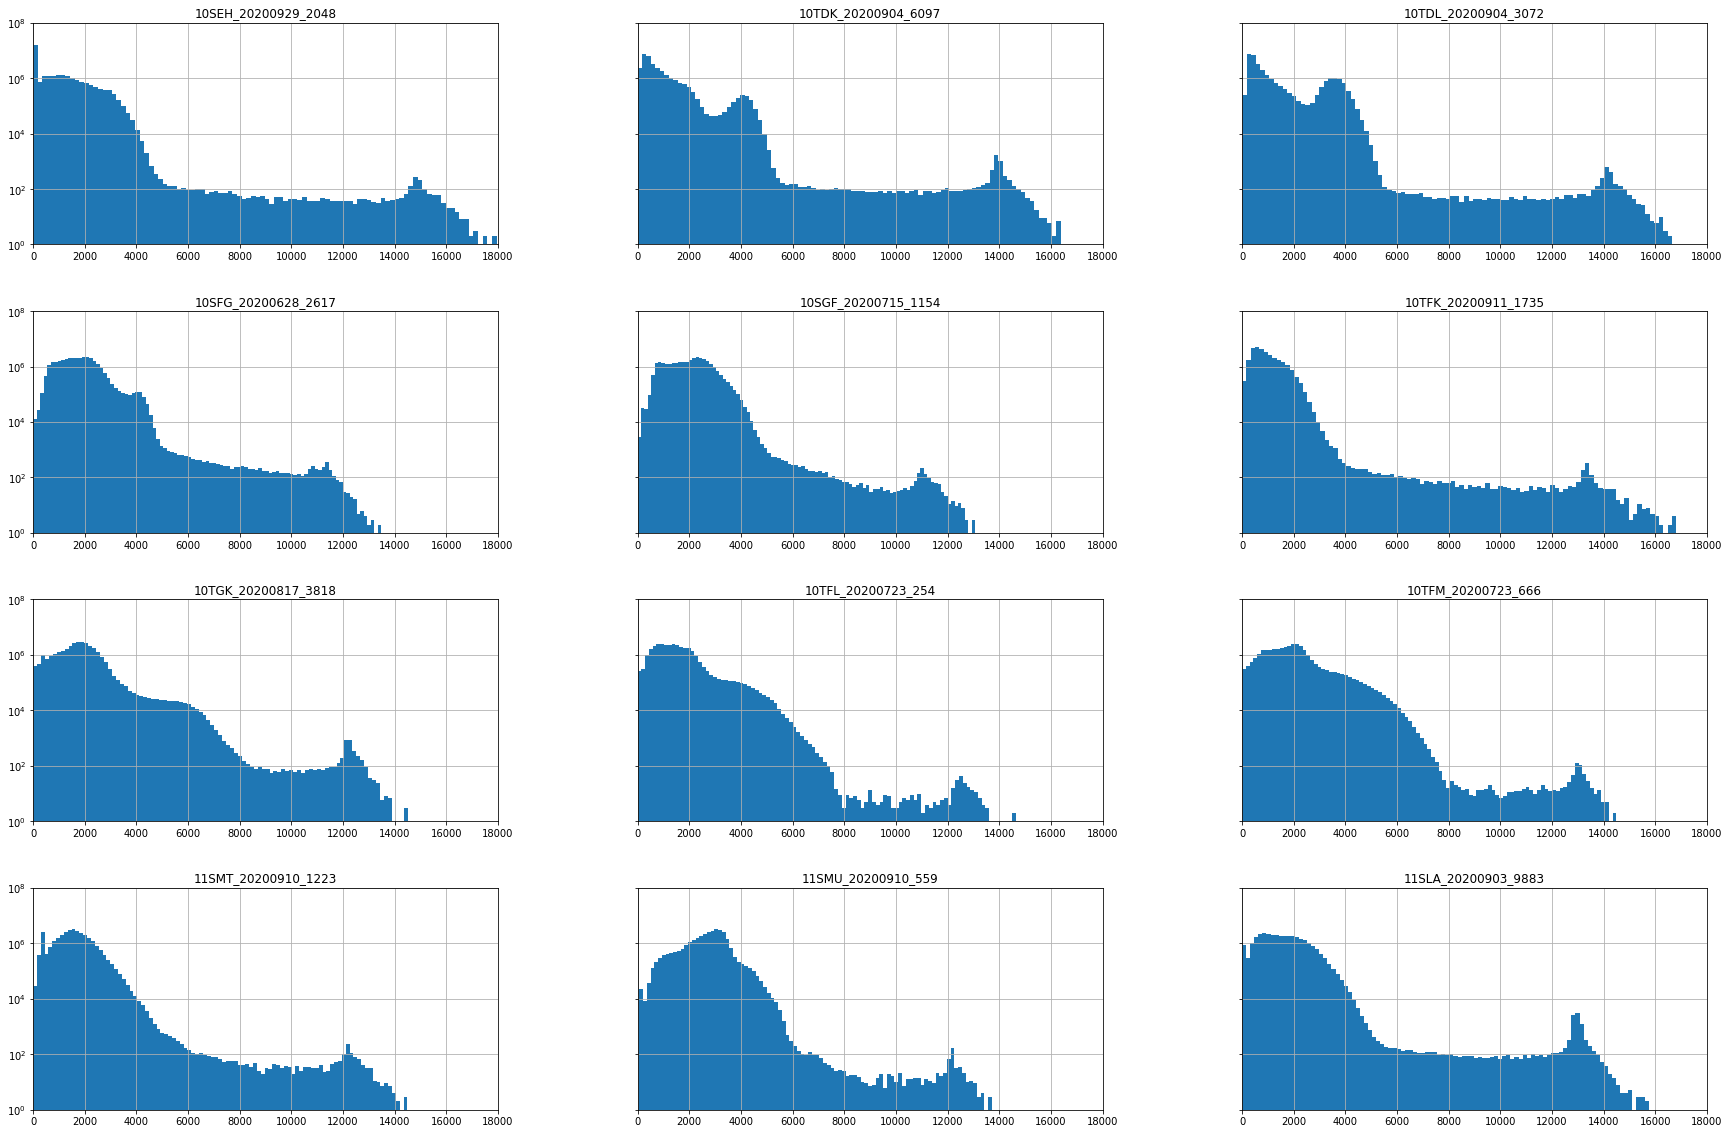

In [133]:
ax = df_p.hist(bins=100, log=True, figsize = (30, 20), sharey=True);

for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i][j].set_xlim((0, 18000));
        ax[i][j].set_ylim((1, 10e7));
plt.savefig('fires.png')

sentinelsat/S2B_MSIL1C_20200929T190109_N0209_R013_T10SEH_20200929T213343.zip


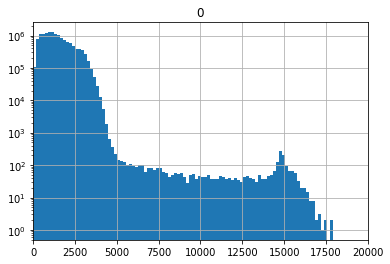

sentinelsat/S2A_MSIL1C_20200904T185921_N0209_R013_T10TDK_20200904T225852.zip


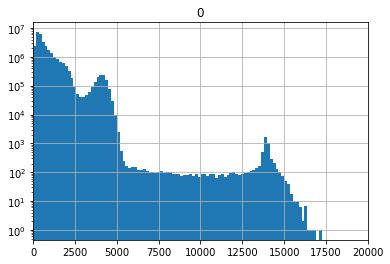

sentinelsat/S2A_MSIL1C_20200904T185921_N0209_R013_T10TDL_20200904T225852.zip


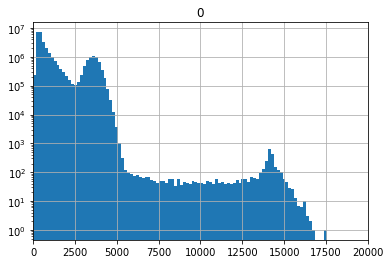

sentinelsat/S2B_MSIL1C_20200628T184919_N0209_R113_T10SFG_20200628T220923.zip


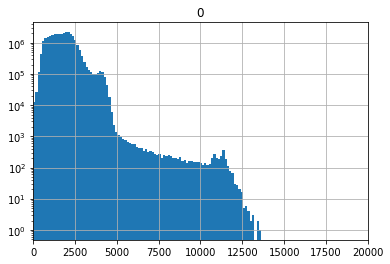

sentinelsat/S2B_MSIL1C_20200715T183919_N0209_R070_T10SGF_20200715T221807.zip


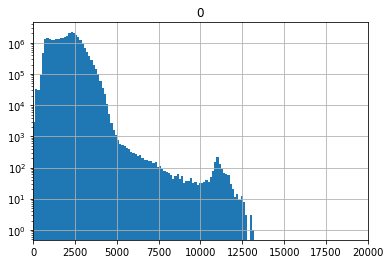

sentinelsat/S2A_MSIL1C_20200911T184951_N0209_R113_T10TFK_20200911T223745.zip


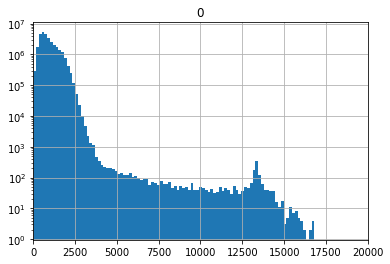

sentinelsat/S2B_MSIL1C_20200817T184919_N0209_R113_T10TGK_20200817T205939.zip


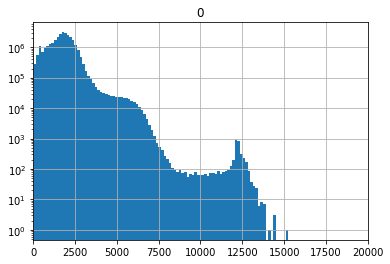

sentinelsat/S2A_MSIL1C_20200723T184921_N0209_R113_T10TFL_20200723T223737.zip


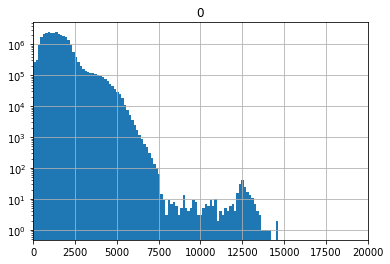

sentinelsat/S2A_MSIL1C_20200723T184921_N0209_R113_T10TFM_20200723T223737.zip


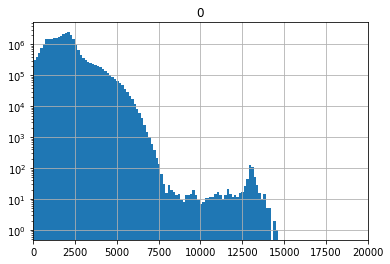

sentinelsat/S2B_MSIL1C_20200910T182929_N0209_R027_T11SMT_20200910T221704.zip


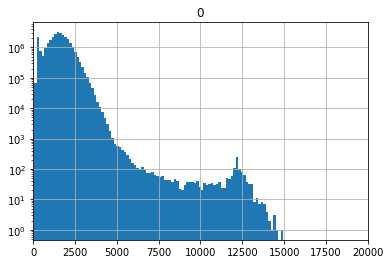

sentinelsat/S2B_MSIL1C_20200910T182929_N0209_R027_T11SMU_20200910T221704.zip


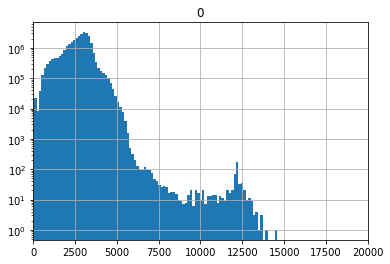

sentinelsat/S2B_MSIL1C_20200903T183919_N0209_R070_T11SLA_20200903T220428.zip


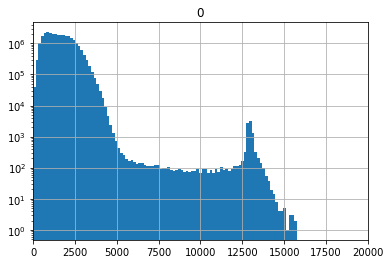

In [68]:
for tile, data in b12s_p.items():
    print(data['path'])
    r = pd.DataFrame(np.array(data['b12']).flatten())
    ax = r[r > 0].hist(bins=100, log=True);
    ax[0][0].set_xlim((0, 20_000))
    plt.show()

# Not fire examples

In [129]:
df_n = pd.DataFrame()

for tile, data in b12s_n.items():
    npa = np.array(data['b12']).flatten()
    df_n[f"{tile}_{data['path'].split('_')[2].split('T')[0]}_{len(npa[npa > 10000])}"] = npa

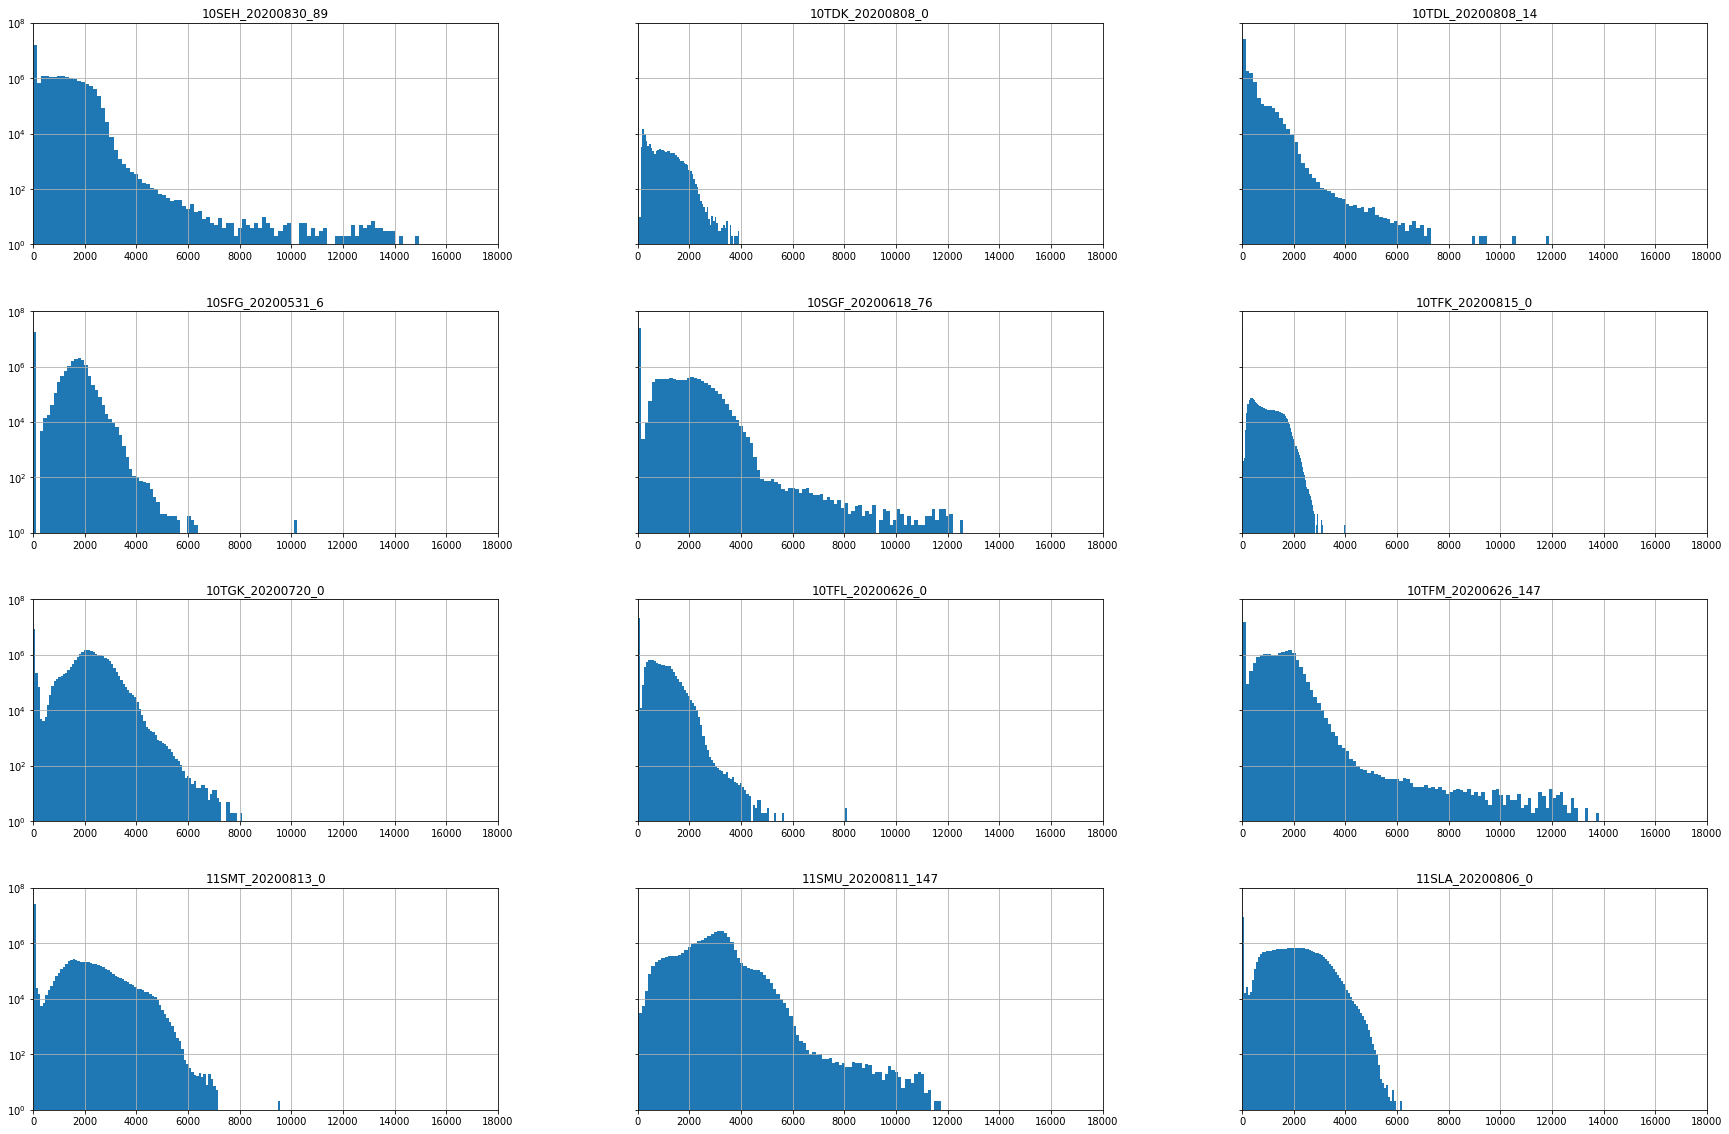

In [130]:
ax = df_n.hist(bins=100, log=True, figsize = (30, 20), sharey=True);

for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i][j].set_xlim((0, 18000));
        ax[i][j].set_ylim((1, 10e7));
plt.savefig('not_fires.png')

sentinelsat/S2B_MSIL1C_20200830T185919_N0209_R013_T10SEH_20200830T211053.zip


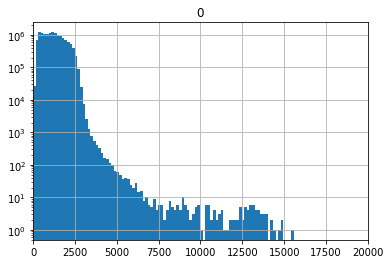

sentinelsat/S2A_MSIL1C_20200808T190921_N0209_R056_T10TDK_20200808T225559.zip


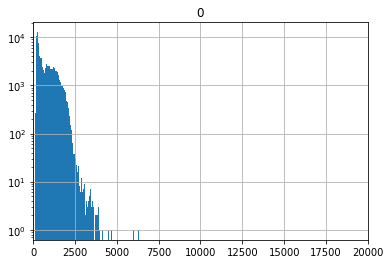

sentinelsat/S2A_MSIL1C_20200808T190921_N0209_R056_T10TDL_20200808T225559.zip


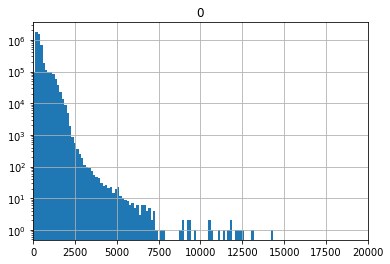

sentinelsat/S2A_MSIL1C_20200531T183921_N0209_R070_T10SFG_20200531T221758.zip


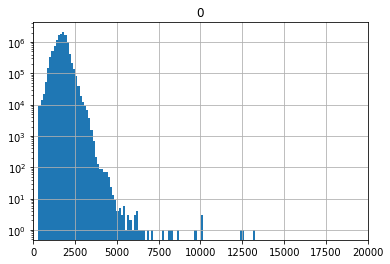

sentinelsat/S2B_MSIL1C_20200618T184919_N0209_R113_T10SGF_20200618T220530.zip


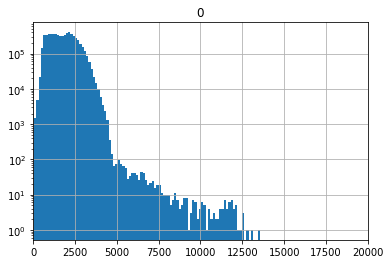

sentinelsat/S2A_MSIL1C_20200815T185921_N0209_R013_T10TFK_20200815T224802.zip


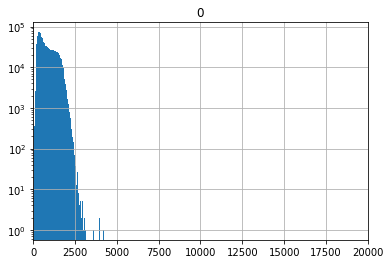

sentinelsat/S2A_MSIL1C_20200720T183921_N0209_R070_T10TGK_20200720T221625.zip


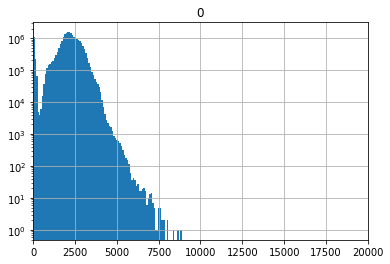

sentinelsat/S2A_MSIL1C_20200626T185921_N0209_R013_T10TFL_20200627T001522.zip


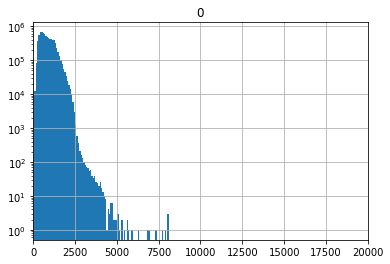

sentinelsat/S2A_MSIL1C_20200626T185921_N0209_R013_T10TFM_20200627T001522.zip


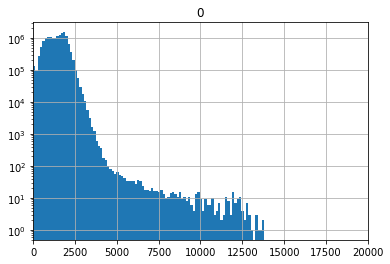

sentinelsat/S2A_MSIL1C_20200813T181931_N0209_R127_T11SMT_20200813T220703.zip


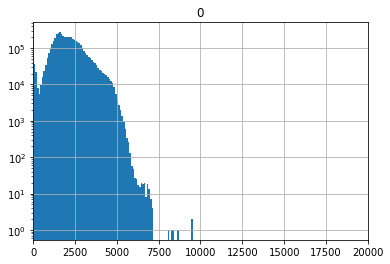

sentinelsat/S2B_MSIL1C_20200811T182919_N0209_R027_T11SMU_20200811T215744.zip


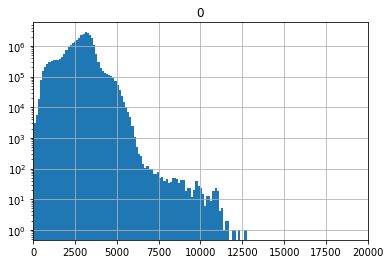

sentinelsat/S2A_MSIL1C_20200806T182921_N0209_R027_T11SLA_20200806T221938.zip


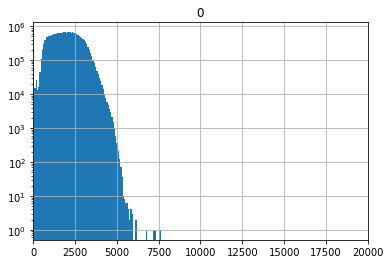

In [69]:
for tile, data in b12s_n.items():
    print(data['path'])
    r = pd.DataFrame(np.array(data['b12']).flatten())
    ax = r[r > 0].hist(bins=100, log=True);
    ax[0][0].set_xlim((0, 20_000))
    plt.show()

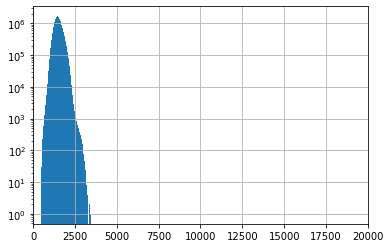

In [117]:
ax = df_p.mean(axis=1).hist(bins=100, log=True);
ax.set_xlim((0, 20_000));

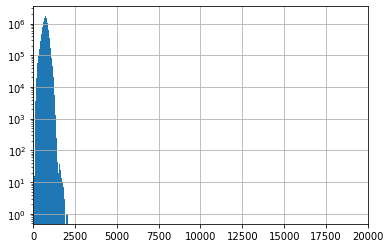

In [119]:
ax = df_n.mean(axis=1).hist(bins=100, log=True);
ax.set_xlim((0, 20_000));

In [140]:
band_print = load_band(Path("sentinelsat/S2B_MSIL1C_20200811T182919_N0209_R027_T11SMU_20200811T215744.zip"), "B12")

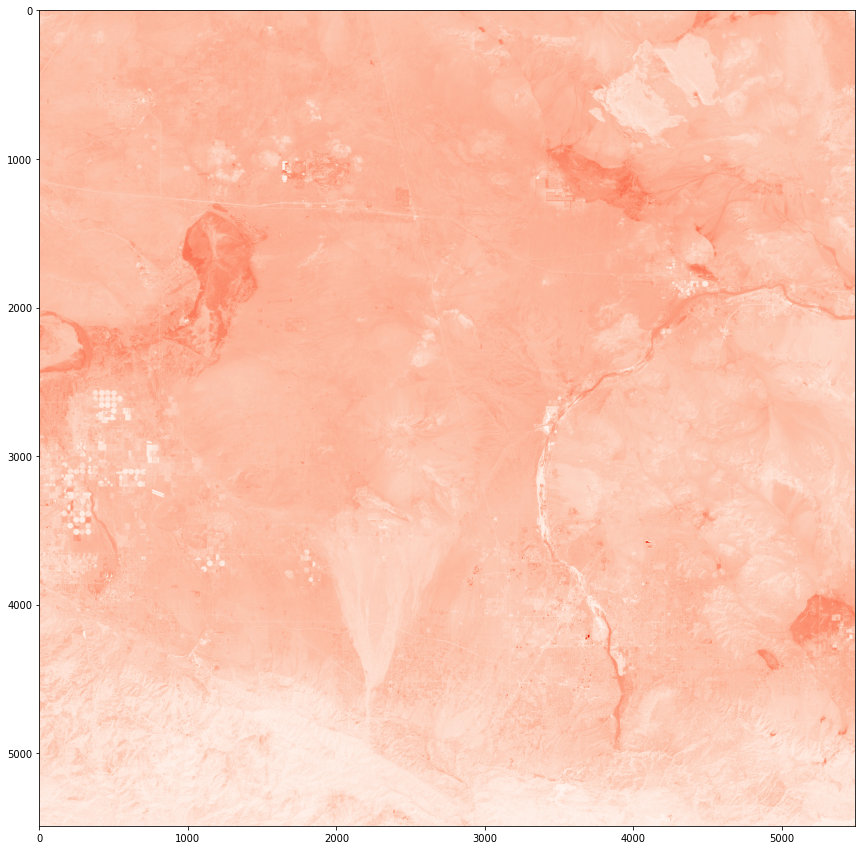

In [141]:
plt.figure(figsize = (30, 15))
plt.imshow(band_print, cmap='Reds')
plt.show()

In [5]:
download('11SLB', ('20201101', '20201103'))

Downloading: 100%|██████████| 834M/834M [03:00<00:00, 4.63MB/s] 
MD5 checksumming: 100%|██████████| 834M/834M [00:01<00:00, 461MB/s] 


In [29]:
download('11SLA', ('20200919', '20200921'))

Downloading: 100%|██████████| 620M/620M [01:42<00:00, 6.05MB/s] 
MD5 checksumming: 100%|██████████| 620M/620M [00:01<00:00, 452MB/s] 


In [33]:
download('18TWL', ('20200903', '20200905'))

Downloading: 100%|██████████| 735M/735M [03:03<00:00, 4.01MB/s] 
MD5 checksumming: 100%|██████████| 735M/735M [00:01<00:00, 501MB/s] 


In [12]:
def load_band(path, band):
    unarchive_dir = path.parent
    shutil.unpack_archive(path, unarchive_dir)
    
    data_path = str(path).replace(".zip", ".SAFE")
    band_files = glob(data_path + "/GRANULE/*/IMG_DATA/*.jp2")

    def get_band_array(band, band_files):
        band_file = [bf for bf in band_files if band in bf][0]
        array = rasterio.open(band_file).read(1)
        return array

    return get_band_array(band, band_files) 

# Fire 1

In [27]:
band = load_band(Path("sentinelsat/S2B_MSIL1C_20201102T184539_N0209_R070_T11SLB_20201102T202906.zip"), "B12")

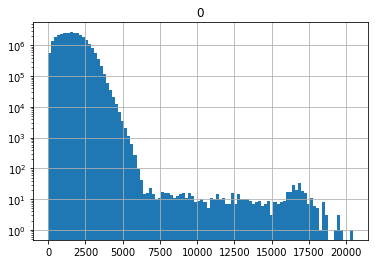

In [106]:
r = pd.DataFrame(np.array(band).flatten())
r[r > 0].hist(bins=100, log=True);

In [107]:
r[r > 10000].count()

0    458
dtype: int64

In [98]:
r[r > 10000].count() / len(r[r > 0])

0    0.000015
dtype: float64

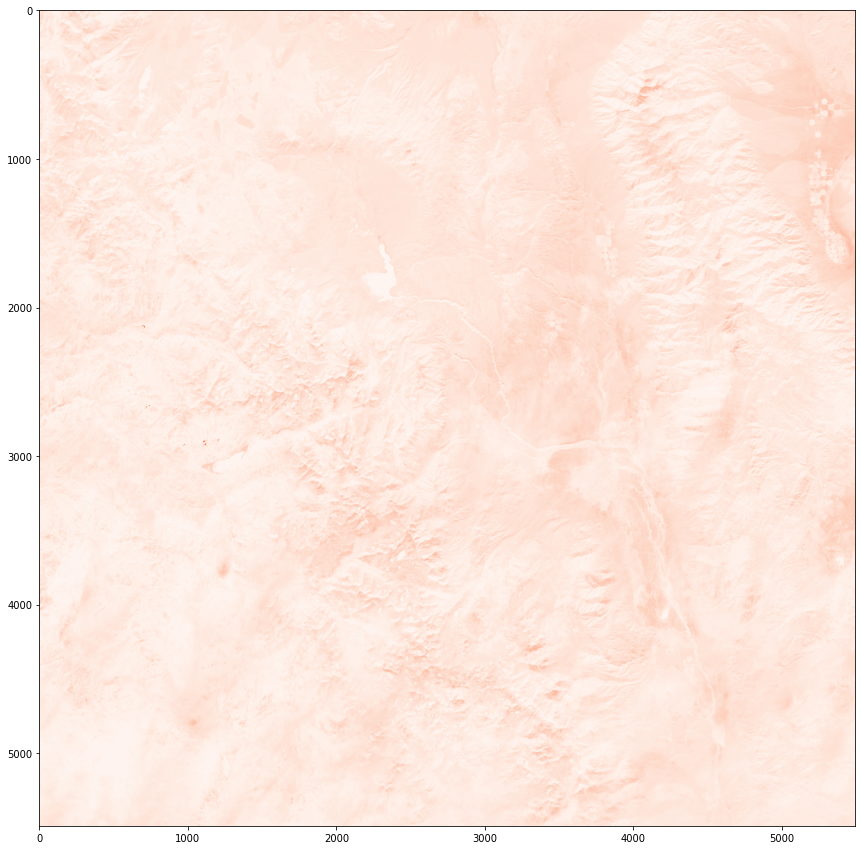

In [54]:
plt.figure(figsize = (30, 15))
plt.imshow(band, cmap='Reds')
plt.show()

# Fire 2

In [65]:
band2 = load_band(Path("sentinelsat/S2B_MSIL1C_20200920T182949_N0209_R027_T11SLA_20200920T215931.zip"), "B12")

band2_blue = load_band(Path("sentinelsat/S2B_MSIL1C_20200920T182949_N0209_R027_T11SLA_20200920T215931.zip"), "B02")
band2_green = load_band(Path("sentinelsat/S2B_MSIL1C_20200920T182949_N0209_R027_T11SLA_20200920T215931.zip"), "B03")
band2_red = load_band(Path("sentinelsat/S2B_MSIL1C_20200920T182949_N0209_R027_T11SLA_20200920T215931.zip"), "B04")

In [12]:
img_path = 'sentinelsat/S2B_MSIL1C_20200929T190109_N0209_R013_T10SEH_20200929T213343.zip'

band2_blue = load_band(Path(img_path), "B02")
band2_green = load_band(Path(img_path), "B03")
band2_red = load_band(Path(img_path), "B04")

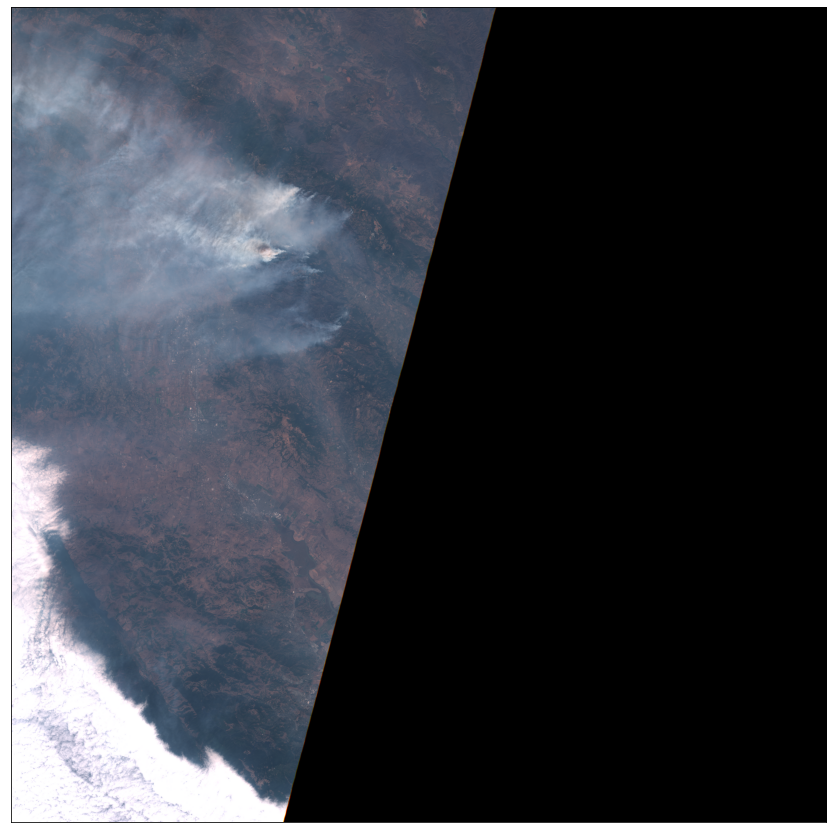

In [16]:
from ds_exploration.plotting_utils import plot_image

rgb = np.dstack([band2_red, band2_green, band2_blue])
plot_image(rgb, factor=5/2e4, clip_range=(0,1))
plt.savefig('true.png', bbox_inches='tight', pad_inches=0)

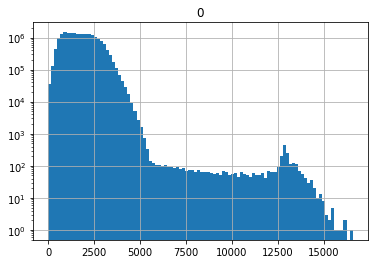

In [108]:
r = pd.DataFrame(np.array(band2).flatten())
r[r > 0].hist(bins=100, log=True);

In [109]:
r[r > 10000].count()

0    2464
dtype: int64

In [96]:
r[r > 10000].count() / len(r[r > 0])

0    0.000082
dtype: float64

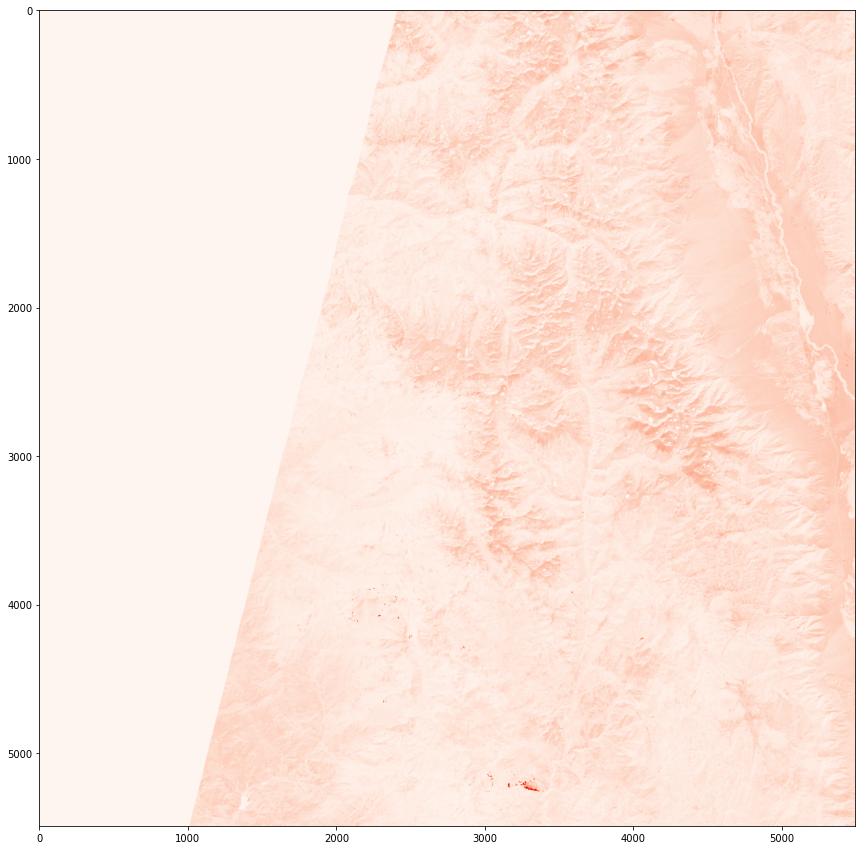

In [69]:
plt.figure(figsize = (30, 15))
plt.imshow(band2, cmap='Reds')
# plt.show()
# plt.savefig('b12.png')

# New-York - No Fire

In [34]:
band_ny = load_band(Path("sentinelsat/S2A_MSIL1C_20200904T153911_N0209_R011_T18TWL_20200904T193911.zip"), "B12")

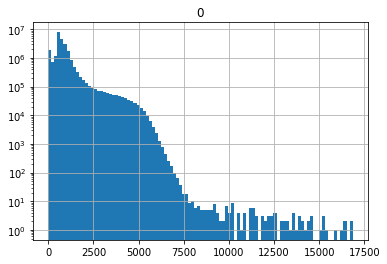

In [110]:
r = pd.DataFrame(np.array(band_ny).flatten())
r[r > 0].hist(bins=100, log=True);

In [111]:
r[r > 10000].count()

0    86
dtype: int64

In [94]:
r[r > 10000].count() / len(r[r > 0])

0    0.000003
dtype: float64

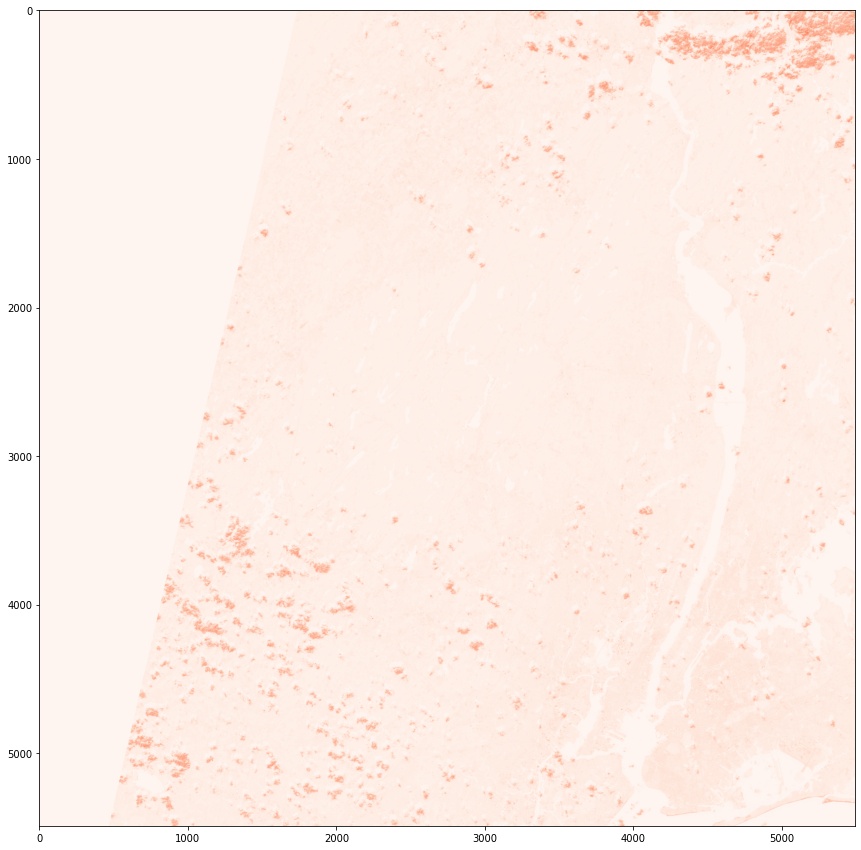

In [56]:
plt.figure(figsize = (30, 15))
plt.imshow(band_ny, cmap='Reds')
plt.show()